# Stack and Pivot



1. Get multi-dimensional data through statistics
2. Using unstack to create two-dimensional data 
3. Use pivot to simplify column data to a two-dimensional intersection
4. The syntax of stack, unstack and pivot

###### 1. Get multi-dimensional data through statistics

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv(
    "datas/movielens-1m/ratings.dat",
    header=None,
    names="UserID::MovieID::Rating::Timestamp".split("::"),
    sep="::",
    engine="python"
)

In [3]:
df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [4]:
df["pdate"] = pd.to_datetime(df["Timestamp"], unit='s')

In [5]:
df.head()

,UserID,MovieID,Rating,Timestamp,pdate
0,1,1193,5,978300760,2000-12-31 22:12:40
1,1,661,3,978302109,2000-12-31 22:35:09
2,1,914,3,978301968,2000-12-31 22:32:48
3,1,3408,4,978300275,2000-12-31 22:04:35
4,1,2355,5,978824291,2001-01-06 23:38:11


In [6]:
df.dtypes

UserID                int64
MovieID               int64
Rating                int64
Timestamp             int64
pdate        datetime64[ns]
dtype: object

In [7]:
# 实现数据统计
df_group = df.groupby([df["pdate"].dt.month, "Rating"])["UserID"].agg(np.sum)
df_group = df_group.to_frame()
df_group.columns = ['pv']

In [8]:
df_group

pv
pdate Rating           
1     1         2613452
      2         5294359
      3        12273331
      4        16452340
      5         9580889
2     1         1608795
      2         3747792
      3         8608216
      4        10941690
      5         5819374
3     1         1344378
      2         2772172
      3         6156512
      4         6911661
      5         3228406
4     1         4397883
      2        10147641
      3        25330546
      4        30406281
      5        18070625
5     1        24893943
      2        41021601
      3        99671422
      4       138699142
      5        98385825
6     1        15896973
      2        31940801
      3        75297592
      4       109067096
      5        72816021
7     1        22506252
      2        44079974
      3       118016191
      4       163188814
      5       104777329
8     1        42290096
      2        80215303
      3       196812819
      4       250299153
      5       165391463
9     1        10185866
      2        19751997
      3        49514561
      4        66638484
      5        43733790
10    1         6825621
      2        14936083
      3        37937741
      4        49413212
      5        31949765
11    1        29762500
      2        55254306
      3       133879416
      4       181288004
      5       118358977
12    1         5474475
      2        11043533
      3        25870578
      4        33351106
      5        19000303

###### 2. Using unstack to create two-dimensional data 

In [9]:
df_stack = df_group.unstack()
df_stack

pv                                           
Rating         1         2          3          4          5
pdate                                                      
1        2613452   5294359   12273331   16452340    9580889
2        1608795   3747792    8608216   10941690    5819374
3        1344378   2772172    6156512    6911661    3228406
4        4397883  10147641   25330546   30406281   18070625
5       24893943  41021601   99671422  138699142   98385825
6       15896973  31940801   75297592  109067096   72816021
7       22506252  44079974  118016191  163188814  104777329
8       42290096  80215303  196812819  250299153  165391463
9       10185866  19751997   49514561   66638484   43733790
10       6825621  14936083   37937741   49413212   31949765
11      29762500  55254306  133879416  181288004  118358977
12       5474475  11043533   25870578   33351106   19000303

<AxesSubplot:xlabel='pdate'>

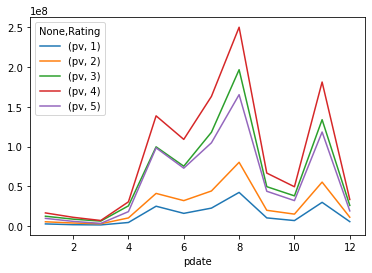

In [10]:
df_stack.plot()

In [11]:
df_stack.stack().head(20)

pv
pdate Rating          
1     1        2613452
      2        5294359
      3       12273331
      4       16452340
      5        9580889
2     1        1608795
      2        3747792
      3        8608216
      4       10941690
      5        5819374
3     1        1344378
      2        2772172
      3        6156512
      4        6911661
      5        3228406
4     1        4397883
      2       10147641
      3       25330546
      4       30406281
      5       18070625

###### 3. Use pivot to simplify column data to a two-dimensional intersection

In [12]:
df_group.head(20)

pv
pdate Rating          
1     1        2613452
      2        5294359
      3       12273331
      4       16452340
      5        9580889
2     1        1608795
      2        3747792
      3        8608216
      4       10941690
      5        5819374
3     1        1344378
      2        2772172
      3        6156512
      4        6911661
      5        3228406
4     1        4397883
      2       10147641
      3       25330546
      4       30406281
      5       18070625

In [13]:
df_reset = df_group.reset_index()
df_reset.head()

,pdate,Rating,pv
0,1,1,2613452
1,1,2,5294359
2,1,3,12273331
3,1,4,16452340
4,1,5,9580889


In [14]:
df_pivot = df_reset.pivot("pdate", "Rating", "pv")

In [15]:
df_pivot.head()

Rating,1,2,3,4,5
pdate,,,,,
1,2613452,5294359,12273331,16452340,9580889
2,1608795,3747792,8608216,10941690,5819374
3,1344378,2772172,6156512,6911661,3228406
4,4397883,10147641,25330546,30406281,18070625
5,24893943,41021601,99671422,138699142,98385825


<AxesSubplot:xlabel='pdate'>

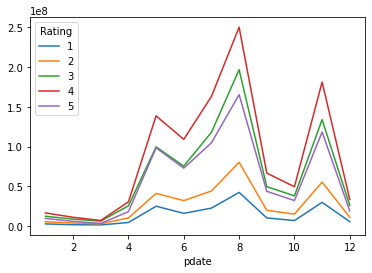

In [16]:
df_pivot.plot()

###### 4. The syntax of stack, unstack and pivot

In [17]:
help(pd.DataFrame.stack)

Help on function stack in module pandas.core.frame:

stack(self, level=-1, dropna=True)
    Stack the prescribed level(s) from columns to index.
    
    Return a reshaped DataFrame or Series having a multi-level
    index with one or more new inner-most levels compared to the current
    DataFrame. The new inner-most levels are created by pivoting the
    columns of the current dataframe:
    
      - if the columns have a single level, the output is a Series;
      - if the columns have multiple levels, the new index
        level(s) is (are) taken from the prescribed level(s) and
        the output is a DataFrame.
    
    The new index levels are sorted.
    
    Parameters
    ----------
    level : int, str, list, default -1
        Level(s) to stack from the column axis onto the index
        axis, defined as one index or label, or a list of indices
        or labels.
    dropna : bool, default True
        Whether to drop rows in the resulting Frame/Series with
        missing 

In [18]:
help(pd.DataFrame.unstack)

Help on function unstack in module pandas.core.frame:

unstack(self, level=-1, fill_value=None)
    Pivot a level of the (necessarily hierarchical) index labels, returning
    a DataFrame having a new level of column labels whose inner-most level
    consists of the pivoted index labels. If the index is not a MultiIndex,
    the output will be a Series (the analogue of stack when the columns are
    not a MultiIndex).
    The level involved will automatically get sorted.
    
    Parameters
    ----------
    level : int, string, or list of these, default -1 (last level)
        Level(s) of index to unstack, can pass level name
    fill_value : replace NaN with this value if the unstack produces
        missing values
    
        .. versionadded:: 0.18.0
    
    See also
    --------
    DataFrame.pivot : Pivot a table based on column values.
    DataFrame.stack : Pivot a level of the column labels (inverse operation
        from `unstack`).
    
    Examples
    --------
    >>> ind

In [19]:
help(pd.DataFrame.pivot)

Help on function pivot in module pandas.core.frame:

pivot(self, index=None, columns=None, values=None)
    Return reshaped DataFrame organized by given index / column values.
    
    Reshape data (produce a "pivot" table) based on column values. Uses
    unique values from specified `index` / `columns` to form axes of the
    resulting DataFrame. This function does not support data
    aggregation, multiple values will result in a MultiIndex in the
    columns. See the :ref:`User Guide <reshaping>` for more on reshaping.
    
    Parameters
    ----------
    index : string or object, optional
        Column to use to make new frame's index. If None, uses
        existing index.
    columns : string or object
        Column to use to make new frame's columns.
    values : string, object or a list of the previous, optional
        Column(s) to use for populating new frame's values. If not
        specified, all remaining columns will be used and the result will
        have hierarchic